In [57]:
import pandas as pd

# Charger les données
file_path = 'Credoc 2019_2024.csv'
credoc_data = pd.read_csv(file_path, delimiter=';')

# Convertir les colonnes de dates en format datetime
credoc_data['DOU'] = pd.to_datetime(credoc_data['DOU'], format='%d/%m/%Y', errors='coerce')
credoc_data['DVAL'] = pd.to_datetime(credoc_data['DVAL'], format='%d/%m/%Y', errors='coerce')

# Afficher les premières lignes du jeu de données
print(credoc_data.head())


          NDOS                             NOMB               NOMD  DEV  \
0  CDE07001004               ASIYLA GUM COMPANY             NEXIRA   86   
1  CDI07007239    SEBANG GLOBAL BATTERY CO, LTD              SICAS    1   
2  CDI07007327  VAN VLIET AUTOMOTIVE TRADING BV        EXCELLEC SA   86   
3  CDI07007196                          SOMADIR            PATISEN   86   
4  CDI07007380                       CPS AFRICA  SYNERGIES AFRIQUE   86   

         MDEV       CLI                 NOM  GES              NOMGES  \
0    57200.00  28671011  ASIYLA GUM COMPANY  455  WRATCHET FOCK TITE   
1    41788.13   8080100               SICAS  933       IBRAHIMA SALL   
2  5335700.00  26007753         EXCELLEC SA  452     DIOKHANE KHADIM   
3   125120.00   8056600             PATISEN  409     MAME ISSA GUEYE   
4   144000.00  15613505   SYNERGIES AFRIQUE  452     DIOKHANE KHADIM   

        TDEV     MONT_LOC         DOU       DVAL MODRE  
0  655.95700  3.752074e+07 2020-04-28 2020-05-31   VUE  
1 

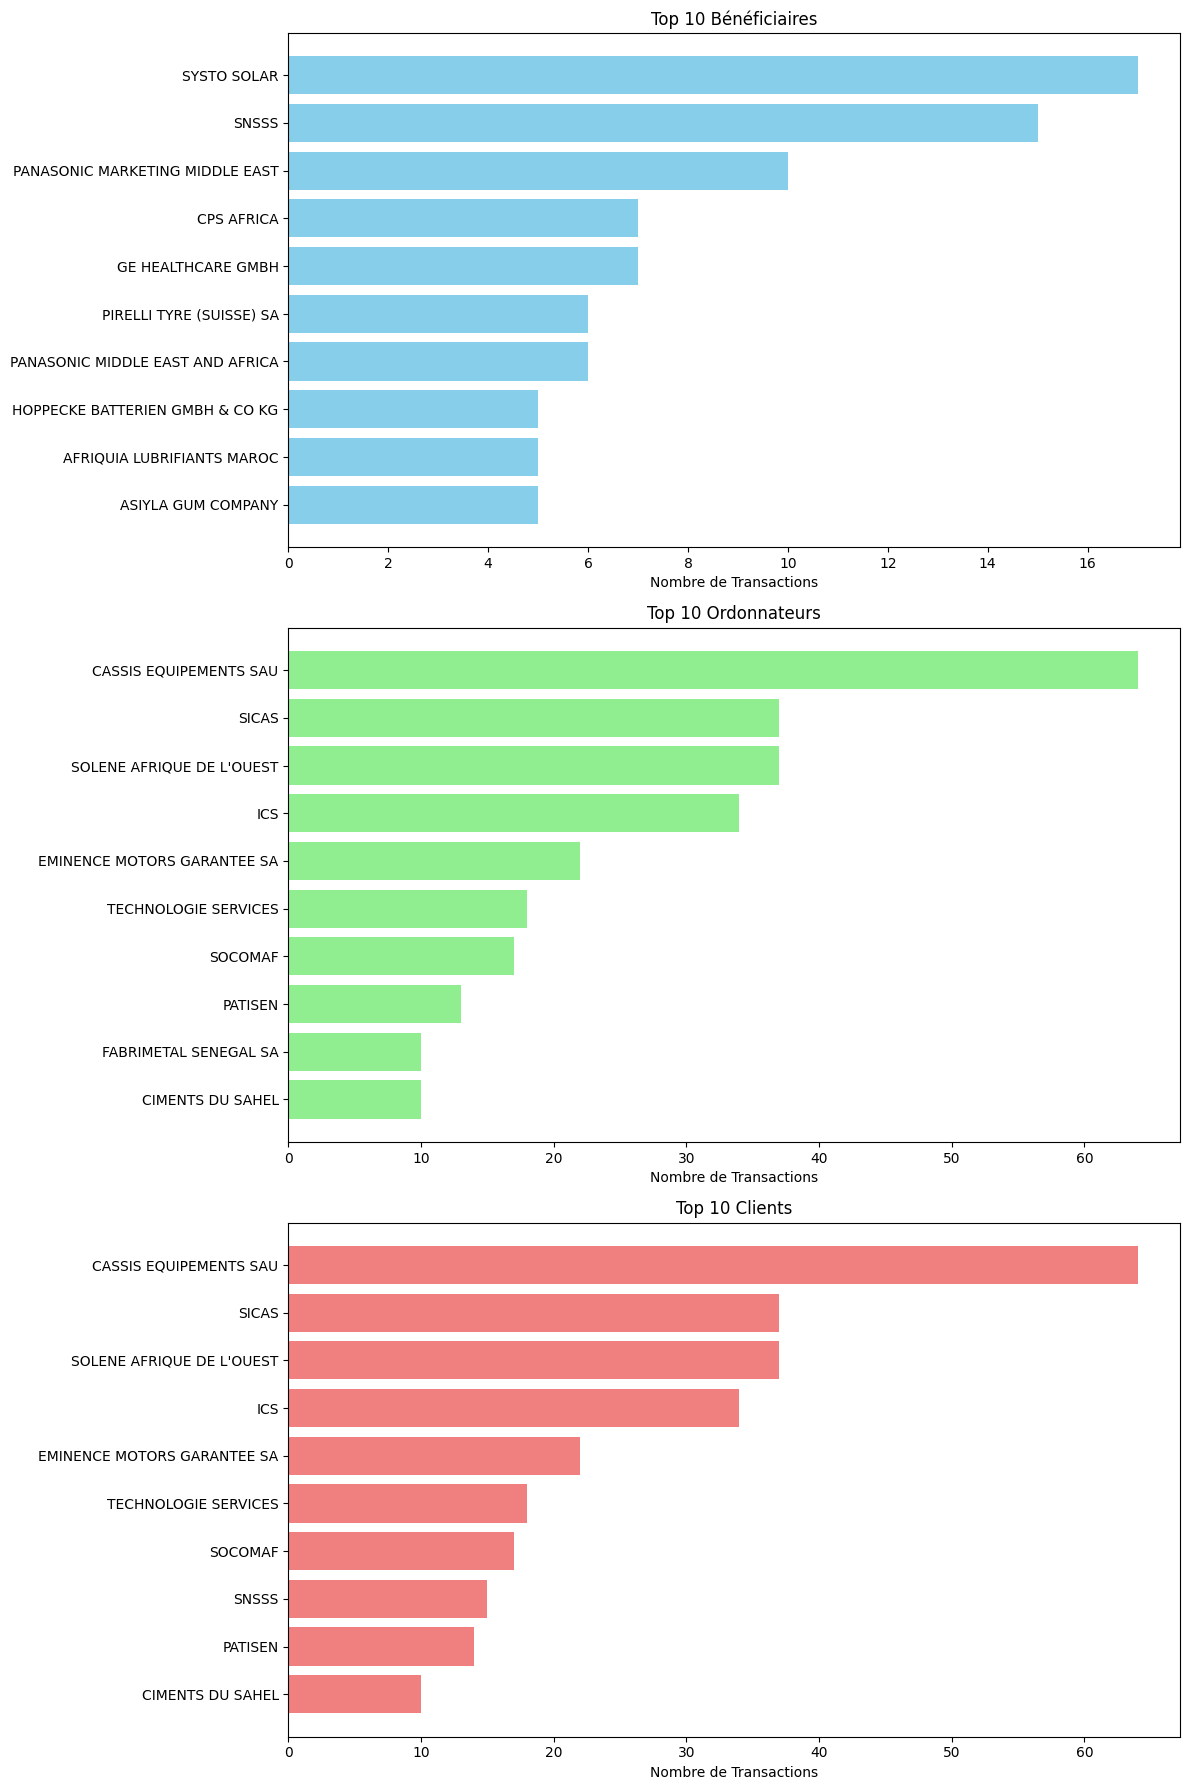

In [58]:
import matplotlib.pyplot as plt

# Calculer les top 10 bénéficiaires
top_10_beneficiaires = credoc_data['NOMB'].value_counts().head(10)

# Calculer les top 10 ordonnateurs
top_10_ordonnateurs = credoc_data['NOMD'].value_counts().head(10)

# Calculer les top 10 clients
top_10_clients = credoc_data['NOM'].value_counts().head(10)

# Créer des graphiques pour les top 10 bénéficiaires, ordonnateurs et clients
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Top 10 Bénéficiaires
axs[0].barh(top_10_beneficiaires.index, top_10_beneficiaires.values, color='skyblue')
axs[0].set_title('Top 10 Bénéficiaires')
axs[0].set_xlabel('Nombre de Transactions')
axs[0].invert_yaxis()

# Top 10 Ordonnateurs
axs[1].barh(top_10_ordonnateurs.index, top_10_ordonnateurs.values, color='lightgreen')
axs[1].set_title('Top 10 Ordonnateurs')
axs[1].set_xlabel('Nombre de Transactions')
axs[1].invert_yaxis()

# Top 10 Clients
axs[2].barh(top_10_clients.index, top_10_clients.values, color='lightcoral')
axs[2].set_title('Top 10 Clients')
axs[2].set_xlabel('Nombre de Transactions')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()


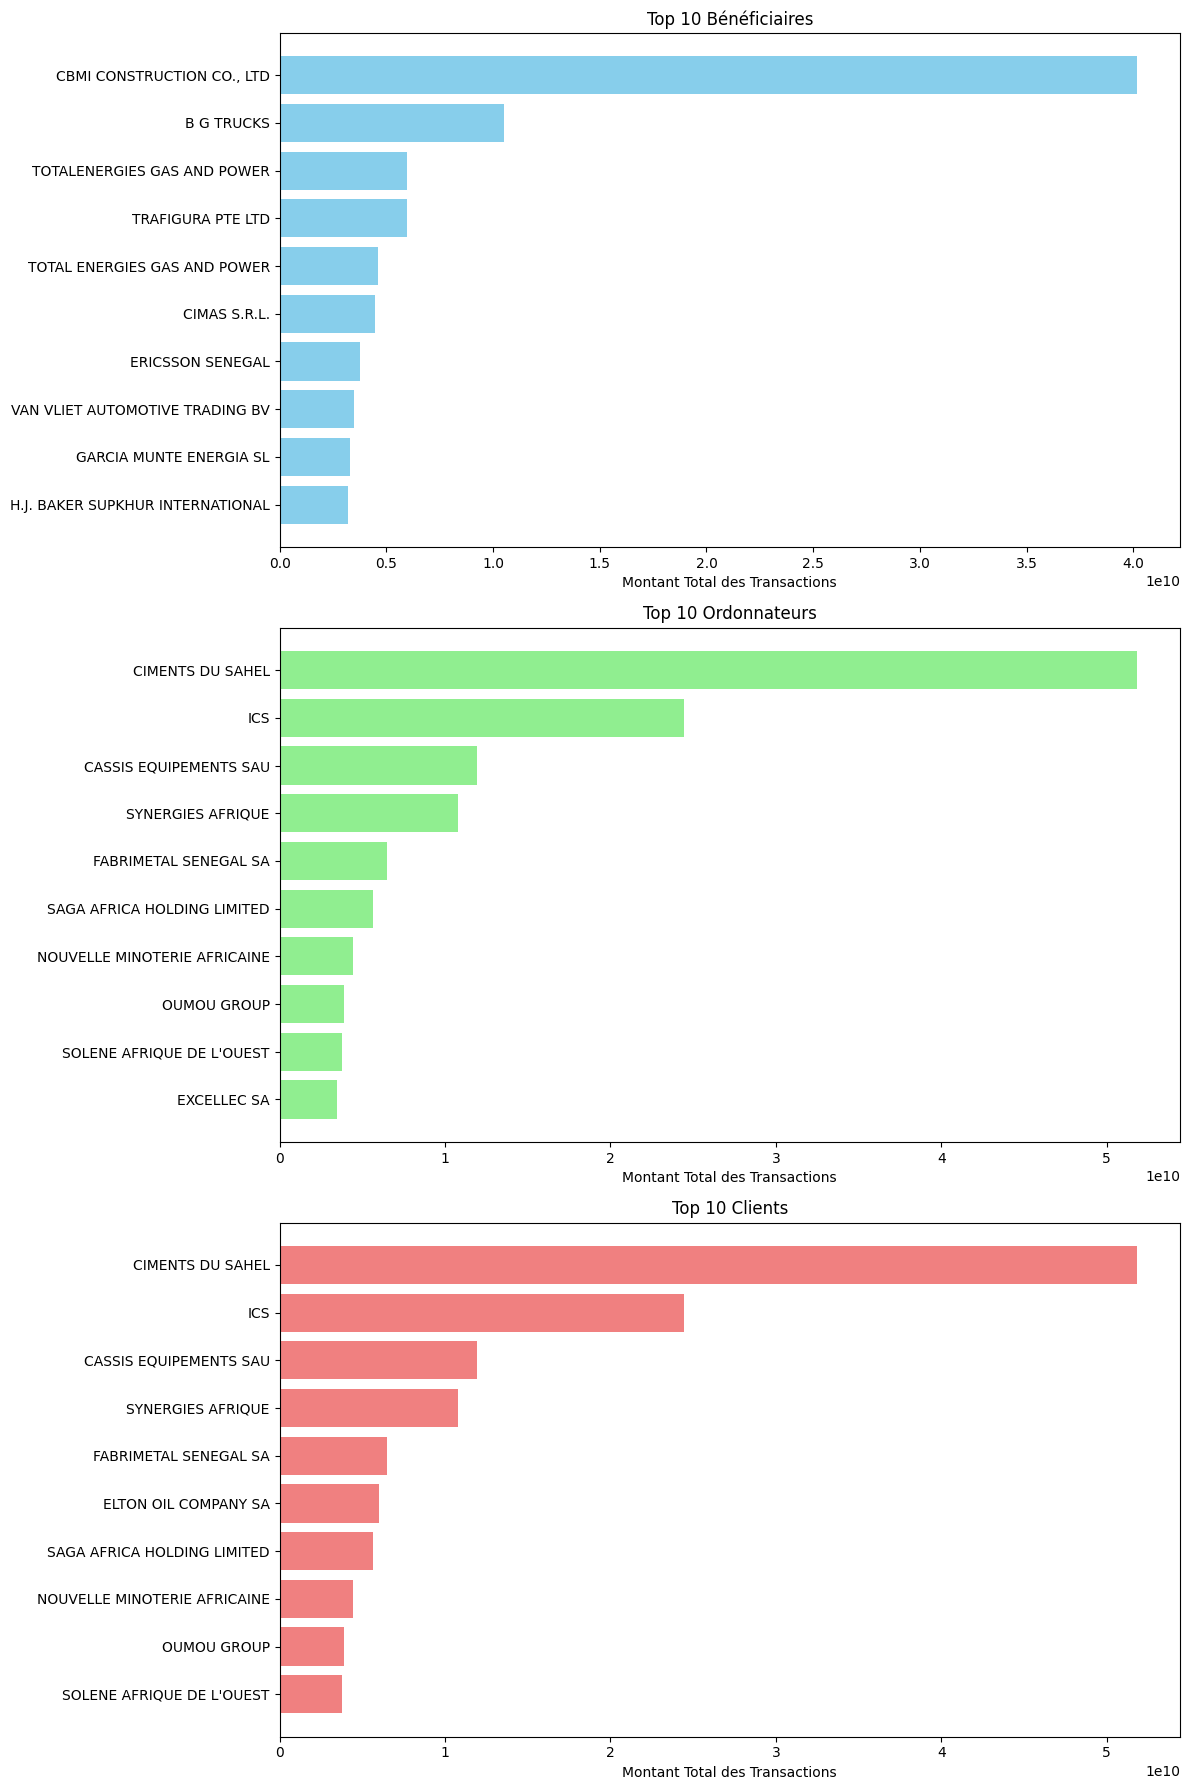

In [59]:
import matplotlib.pyplot as plt

# Calculer les top 10 bénéficiaires en fonction du montant total des transactions
top_10_beneficiaires = credoc_data.groupby('NOMB')[' MONT_LOC '].sum().nlargest(10)

# Calculer les top 10 ordonnateurs en fonction du montant total des transactions
top_10_ordonnateurs = credoc_data.groupby('NOMD')[' MONT_LOC '].sum().nlargest(10)

# Calculer les top 10 clients en fonction du montant total des transactions
top_10_clients = credoc_data.groupby('NOM')[' MONT_LOC '].sum().nlargest(10)

# Créer des graphiques pour les top 10 bénéficiaires, ordonnateurs et clients
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Top 10 Bénéficiaires
axs[0].barh(top_10_beneficiaires.index, top_10_beneficiaires.values, color='skyblue')
axs[0].set_title('Top 10 Bénéficiaires')
axs[0].set_xlabel('Montant Total des Transactions')
axs[0].invert_yaxis()

# Top 10 Ordonnateurs
axs[1].barh(top_10_ordonnateurs.index, top_10_ordonnateurs.values, color='lightgreen')
axs[1].set_title('Top 10 Ordonnateurs')
axs[1].set_xlabel('Montant Total des Transactions')
axs[1].invert_yaxis()

# Top 10 Clients
axs[2].barh(top_10_clients.index, top_10_clients.values, color='lightcoral')
axs[2].set_title('Top 10 Clients')
axs[2].set_xlabel('Montant Total des Transactions')
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()


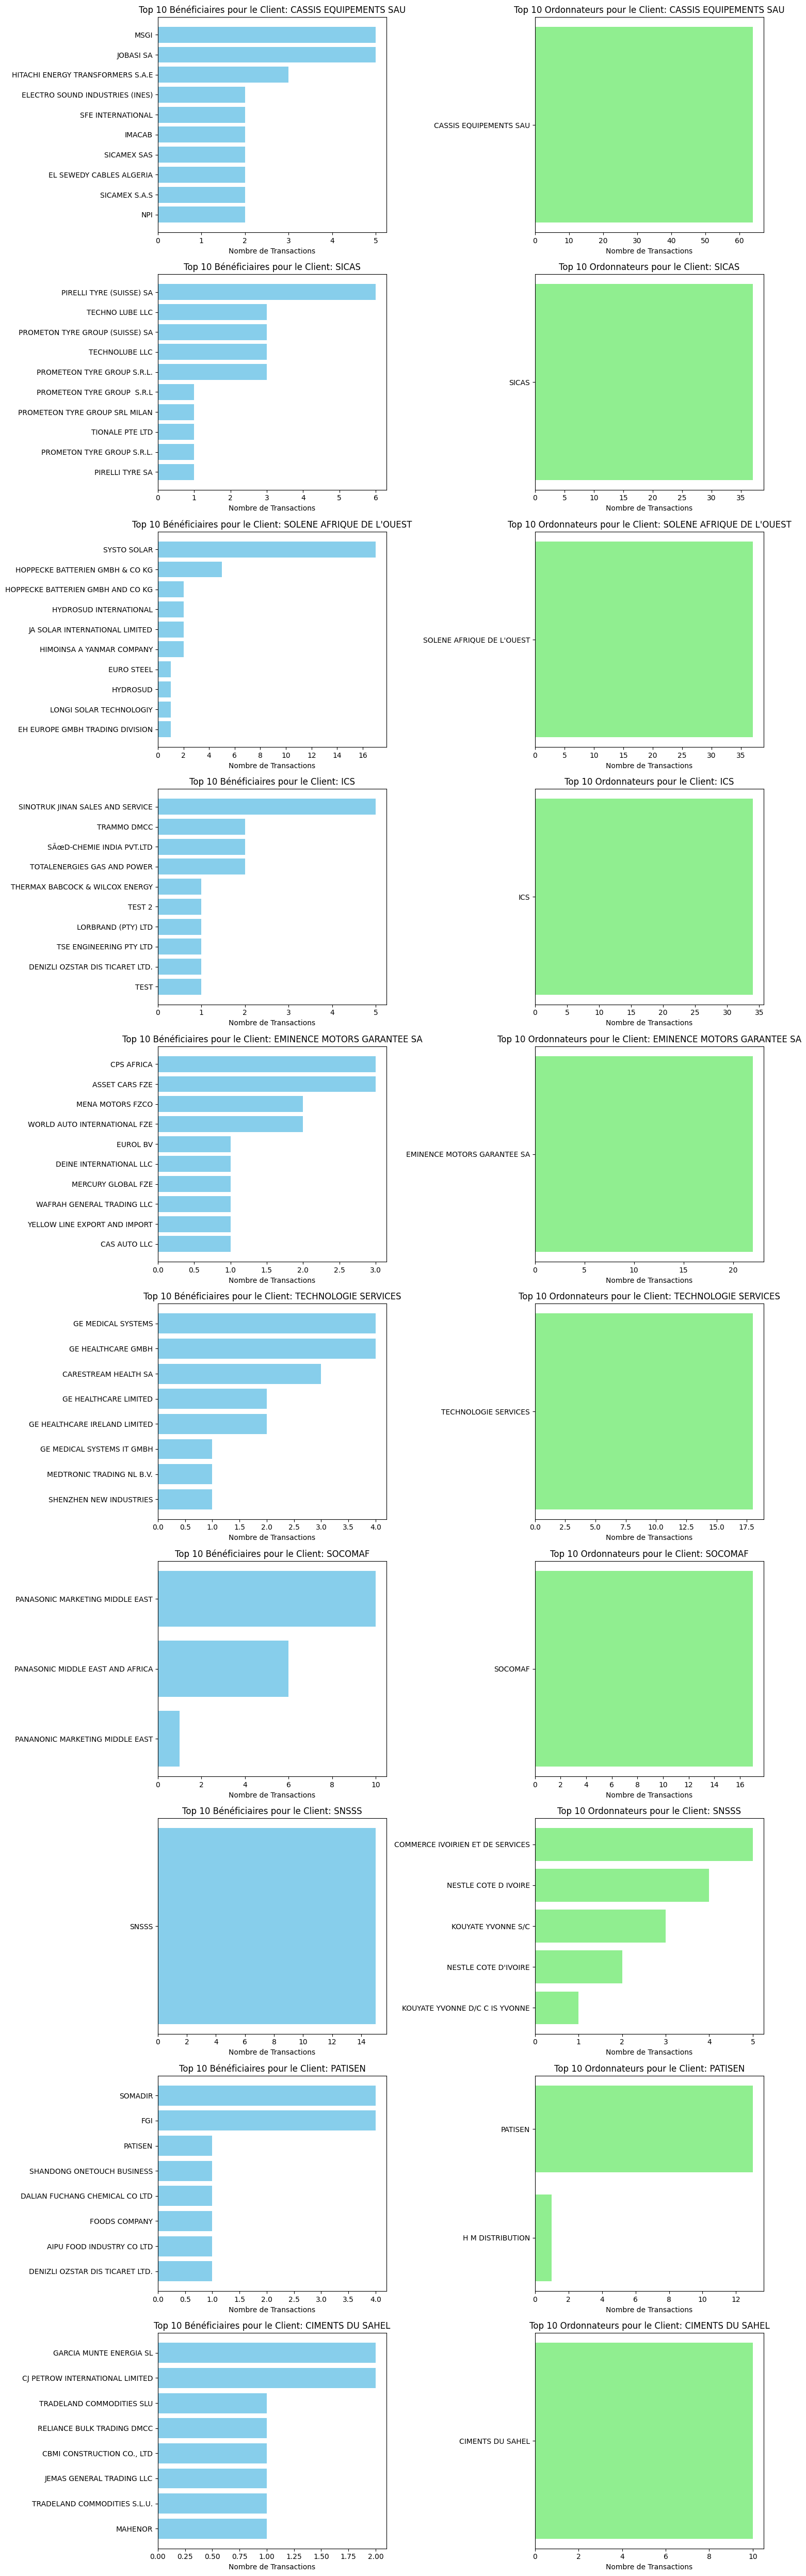

In [60]:
import matplotlib.pyplot as plt

# Calculer les top 10 clients
top_10_clients = credoc_data['NOM'].value_counts().head(10).index

# Créer une figure pour les graphiques
fig, axs = plt.subplots(len(top_10_clients), 2, figsize=(15, 50))

# Itérer sur chaque top client
for i, client in enumerate(top_10_clients):
    client_data = credoc_data[credoc_data['NOM'] == client]
    
    # Calculer les top 10 bénéficiaires pour ce client
    top_10_beneficiaires = client_data['NOMB'].value_counts().head(10)
    
    # Calculer les top 10 ordonnateurs pour ce client
    top_10_ordonnateurs = client_data['NOMD'].value_counts().head(10)
    
    # Plotting top 10 bénéficiaires
    axs[i, 0].barh(top_10_beneficiaires.index, top_10_beneficiaires.values, color='skyblue')
    axs[i, 0].set_title(f'Top 10 Bénéficiaires pour le Client: {client}')
    axs[i, 0].set_xlabel('Nombre de Transactions')
    axs[i, 0].invert_yaxis()
    
    # Plotting top 10 ordonnateurs
    axs[i, 1].barh(top_10_ordonnateurs.index, top_10_ordonnateurs.values, color='lightgreen')
    axs[i, 1].set_title(f'Top 10 Ordonnateurs pour le Client: {client}')
    axs[i, 1].set_xlabel('Nombre de Transactions')
    axs[i, 1].invert_yaxis()

plt.tight_layout()
plt.show()



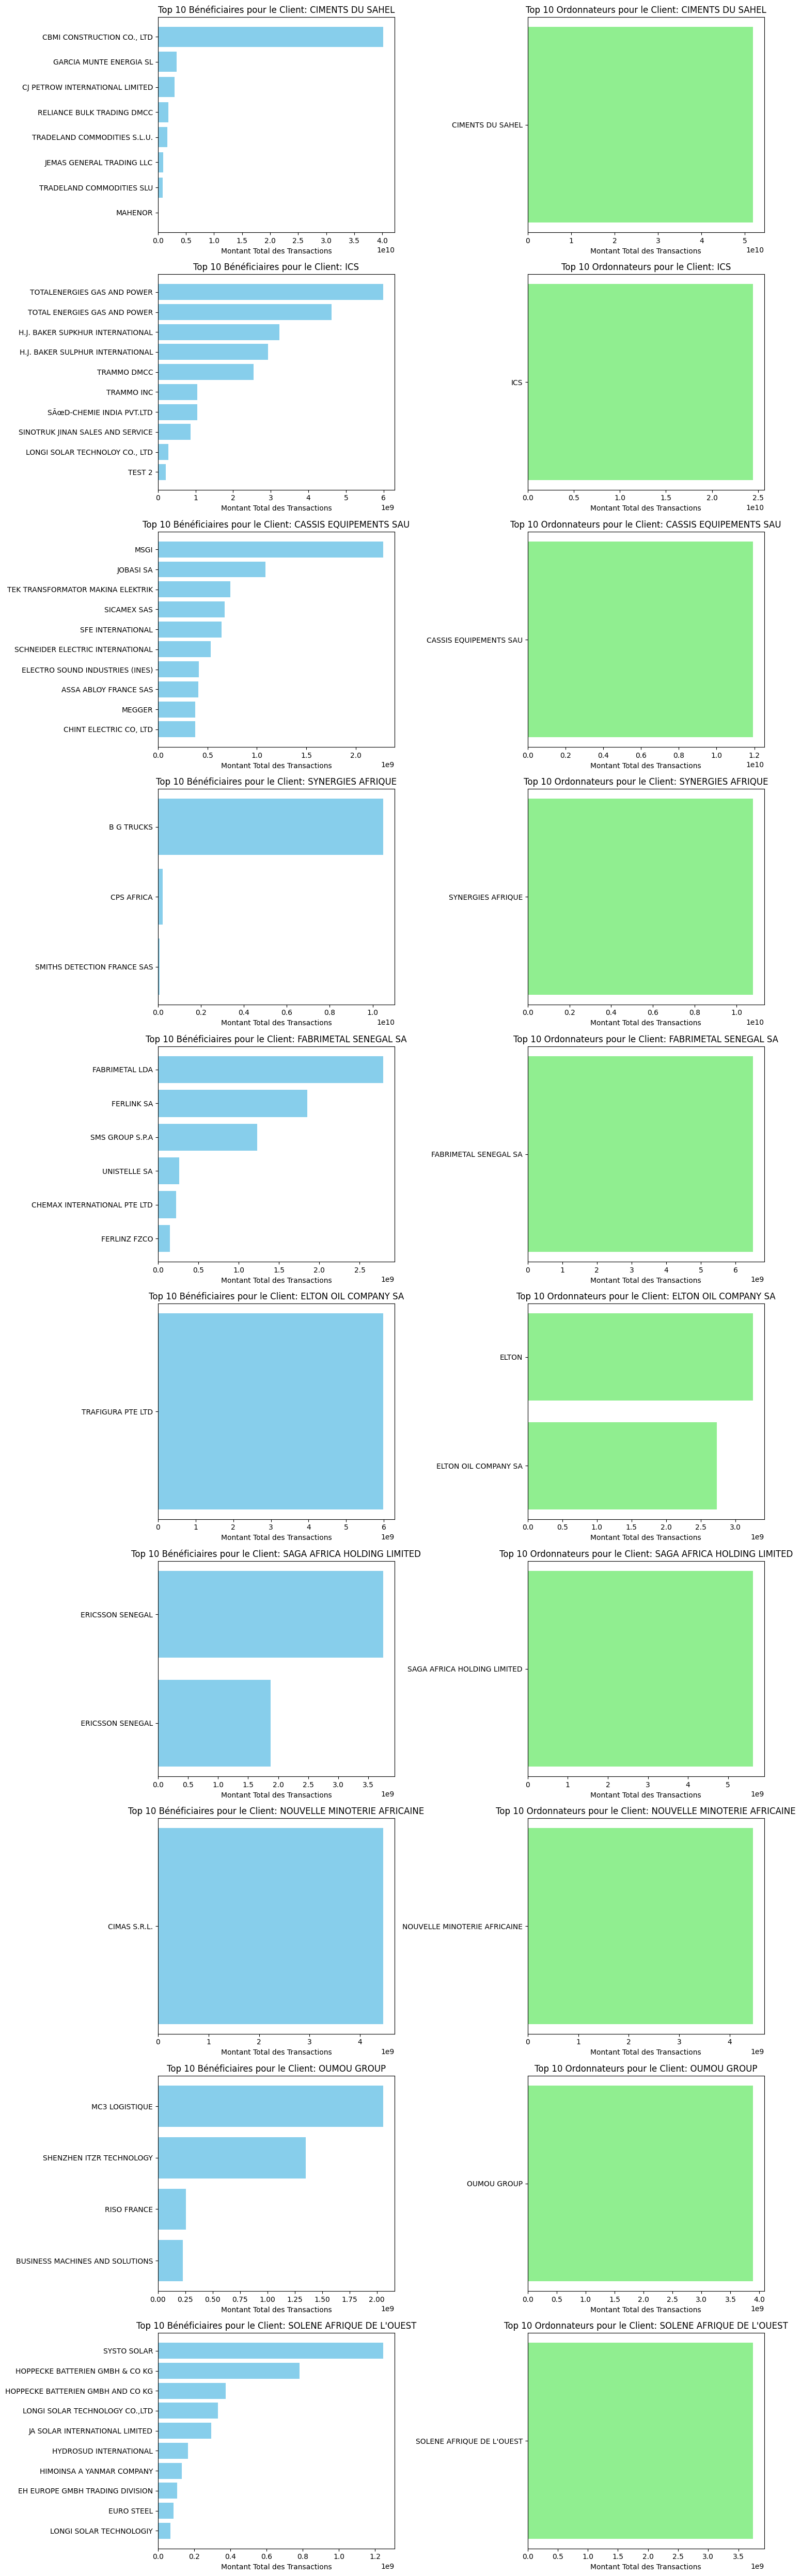

In [61]:
import matplotlib.pyplot as plt

# Calculer les top 10 clients en fonction du montant total des transactions
top_10_clients = credoc_data.groupby('NOM')[' MONT_LOC '].sum().nlargest(10).index

# Créer une figure pour les graphiques
fig, axs = plt.subplots(len(top_10_clients), 2, figsize=(15, 50))

# Itérer sur chaque top client
for i, client in enumerate(top_10_clients):
    client_data = credoc_data[credoc_data['NOM'] == client]
    
    # Calculer les top 10 bénéficiaires pour ce client en fonction du montant total
    top_10_beneficiaires = client_data.groupby('NOMB')[' MONT_LOC '].sum().nlargest(10)
    
    # Calculer les top 10 ordonnateurs pour ce client en fonction du montant total
    top_10_ordonnateurs = client_data.groupby('NOMD')[' MONT_LOC '].sum().nlargest(10)
    
    # Plotting top 10 bénéficiaires
    axs[i, 0].barh(top_10_beneficiaires.index, top_10_beneficiaires.values, color='skyblue')
    axs[i, 0].set_title(f'Top 10 Bénéficiaires pour le Client: {client}')
    axs[i, 0].set_xlabel('Montant Total des Transactions')
    axs[i, 0].invert_yaxis()
    
    # Plotting top 10 ordonnateurs
    axs[i, 1].barh(top_10_ordonnateurs.index, top_10_ordonnateurs.values, color='lightgreen')
    axs[i, 1].set_title(f'Top 10 Ordonnateurs pour le Client: {client}')
    axs[i, 1].set_xlabel('Montant Total des Transactions')
    axs[i, 1].invert_yaxis()

plt.tight_layout()
plt.show()



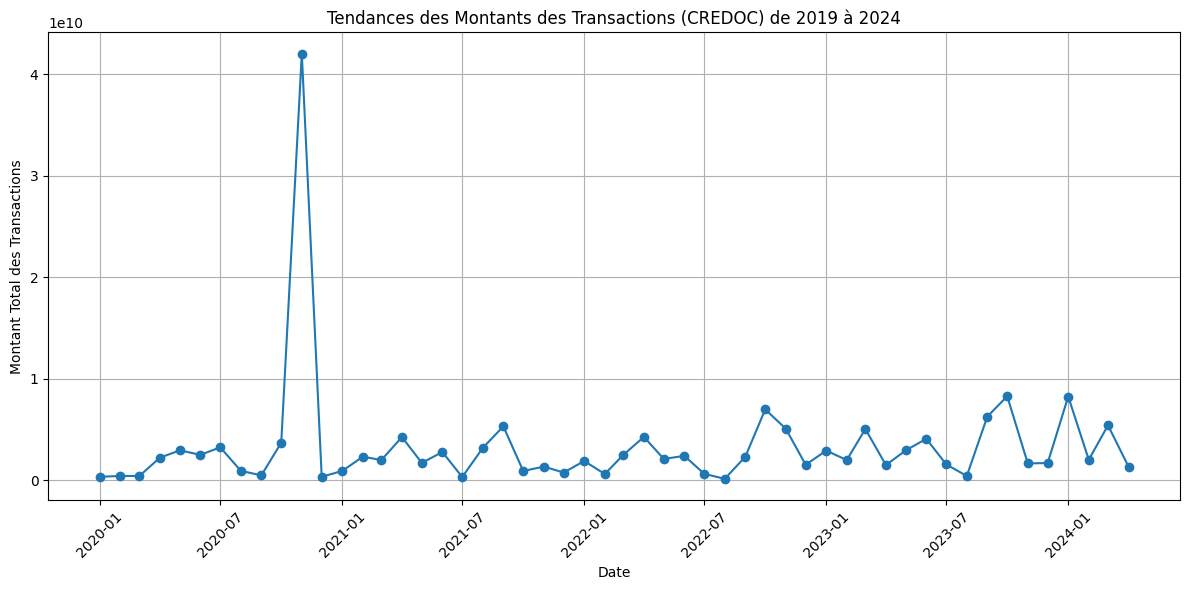

In [62]:
import matplotlib.pyplot as plt
# Convertir les dates en périodes mensuelles

credoc_data['MonthYear'] = credoc_data['DOU'].dt.to_period('M')

# Calculer la somme des montants en CFA pour chaque mois sur toute la période
monthly_sum_mont_loc = credoc_data.groupby('MonthYear')[' MONT_LOC '].sum()

# Convertir les périodes en dates pour la visualisation
monthly_sum_mont_loc.index = monthly_sum_mont_loc.index.to_timestamp()


# Créer le graphique des tendances mensuelles pour les montants en CFA
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_mont_loc.index, monthly_sum_mont_loc.values, marker='o', linestyle='-')
plt.title('Tendances des Montants des Transactions (CREDOC) de 2019 à 2024')
plt.xlabel('Date')
plt.ylabel('Montant Total des Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





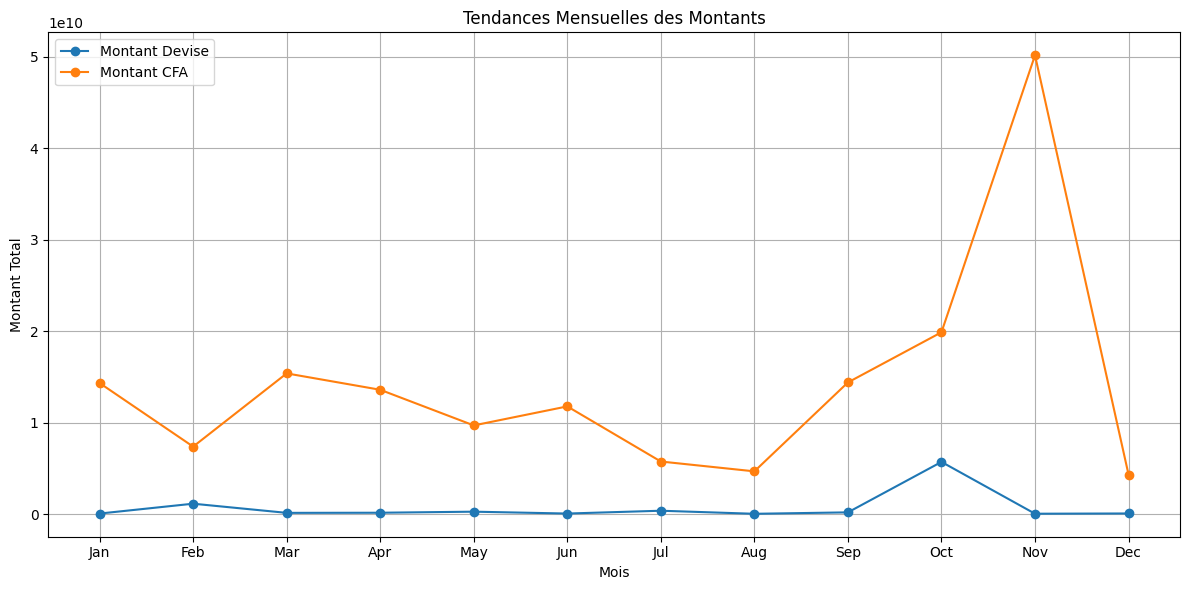

In [63]:
# Calculer la somme des montants en devise pour chaque mois
credoc_data['Year'] = credoc_data['DOU'].dt.year
credoc_data['Month'] = credoc_data['DOU'].dt.month

monthly_sum_mdev = credoc_data.groupby('Month')['MDEV'].sum()

# Calculer la somme des montants en CFA pour chaque mois
monthly_sum_mont_loc = credoc_data.groupby('Month')[' MONT_LOC '].sum()

# Créer le graphique des tendances mensuelles pour les deux types de montants
plt.figure(figsize=(12, 6))

# Tracer les montants en devise
plt.plot(monthly_sum_mdev.index, monthly_sum_mdev.values, marker='o', linestyle='-', label='Montant Devise')

# Tracer les montants en CFA
plt.plot(monthly_sum_mont_loc.index, monthly_sum_mont_loc.values, marker='o', linestyle='-', label='Montant CFA')

# Configuration du graphique
plt.title('Tendances Mensuelles des Montants')
plt.xlabel('Mois')
plt.ylabel('Montant Total')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Afficher le graphique
plt.tight_layout()
plt.show()




In [64]:
# Filtrer les données pour les top 10 clients
credoc_data_top_clients = credoc_data[credoc_data['NOM'].isin(top_10_clients)]

# Calculer la somme des montants des transactions pour chaque mois pour chaque client
monthly_trends_top_clients = credoc_data_top_clients.groupby(['NOM', 'MonthYear'])[' MONT_LOC '].sum().unstack(level=0)
monthly_trends_top_clients = monthly_trends_top_clients.fillna(0)  # Remplir les valeurs manquantes avec 0
monthly_trends_top_clients.index = monthly_trends_top_clients.index.to_timestamp()


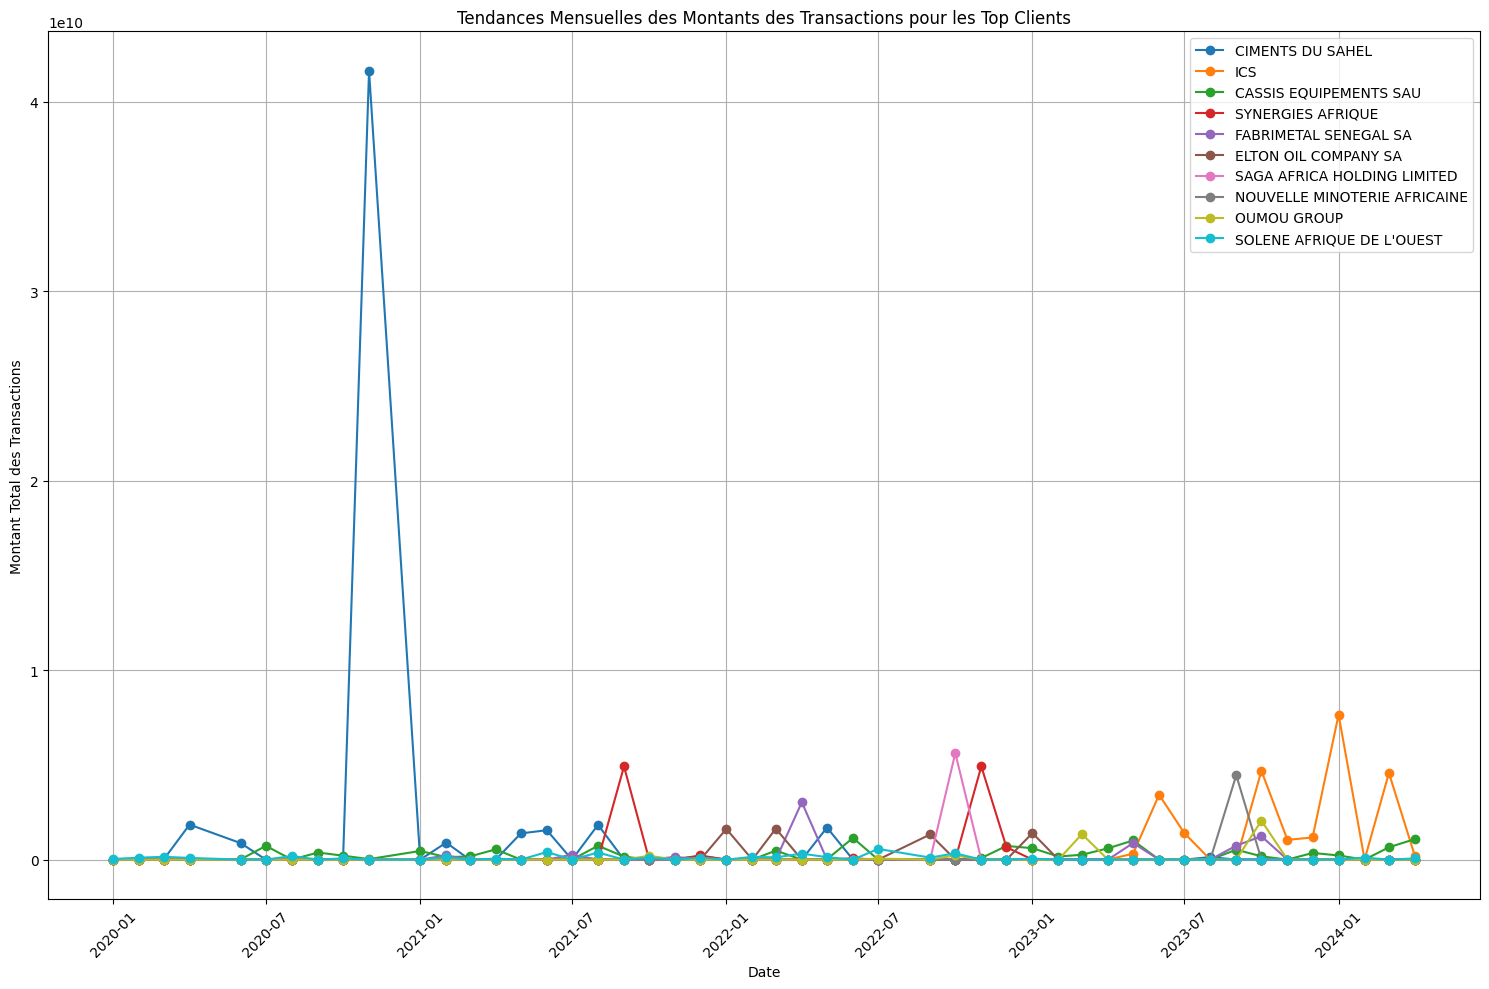

In [65]:
# Créer des graphiques pour les tendances mensuelles des top clients
plt.figure(figsize=(15, 10))

for client in top_10_clients:
    plt.plot(monthly_trends_top_clients.index, monthly_trends_top_clients[client], marker='o', linestyle='-', label=client)

# Configuration du graphique
plt.title('Tendances Mensuelles des Montants des Transactions pour les Top Clients')
plt.xlabel('Date')
plt.ylabel('Montant Total des Transactions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [66]:
# Calculer la moyenne des montants des transactions pour chaque mois pour chaque client
monthly_avg_top_clients = credoc_data_top_clients.groupby(['NOM', 'Month'])[' MONT_LOC '].mean().unstack(level=0)
monthly_avg_top_clients = monthly_avg_top_clients.fillna(0)  # Remplir les valeurs manquantes avec 0



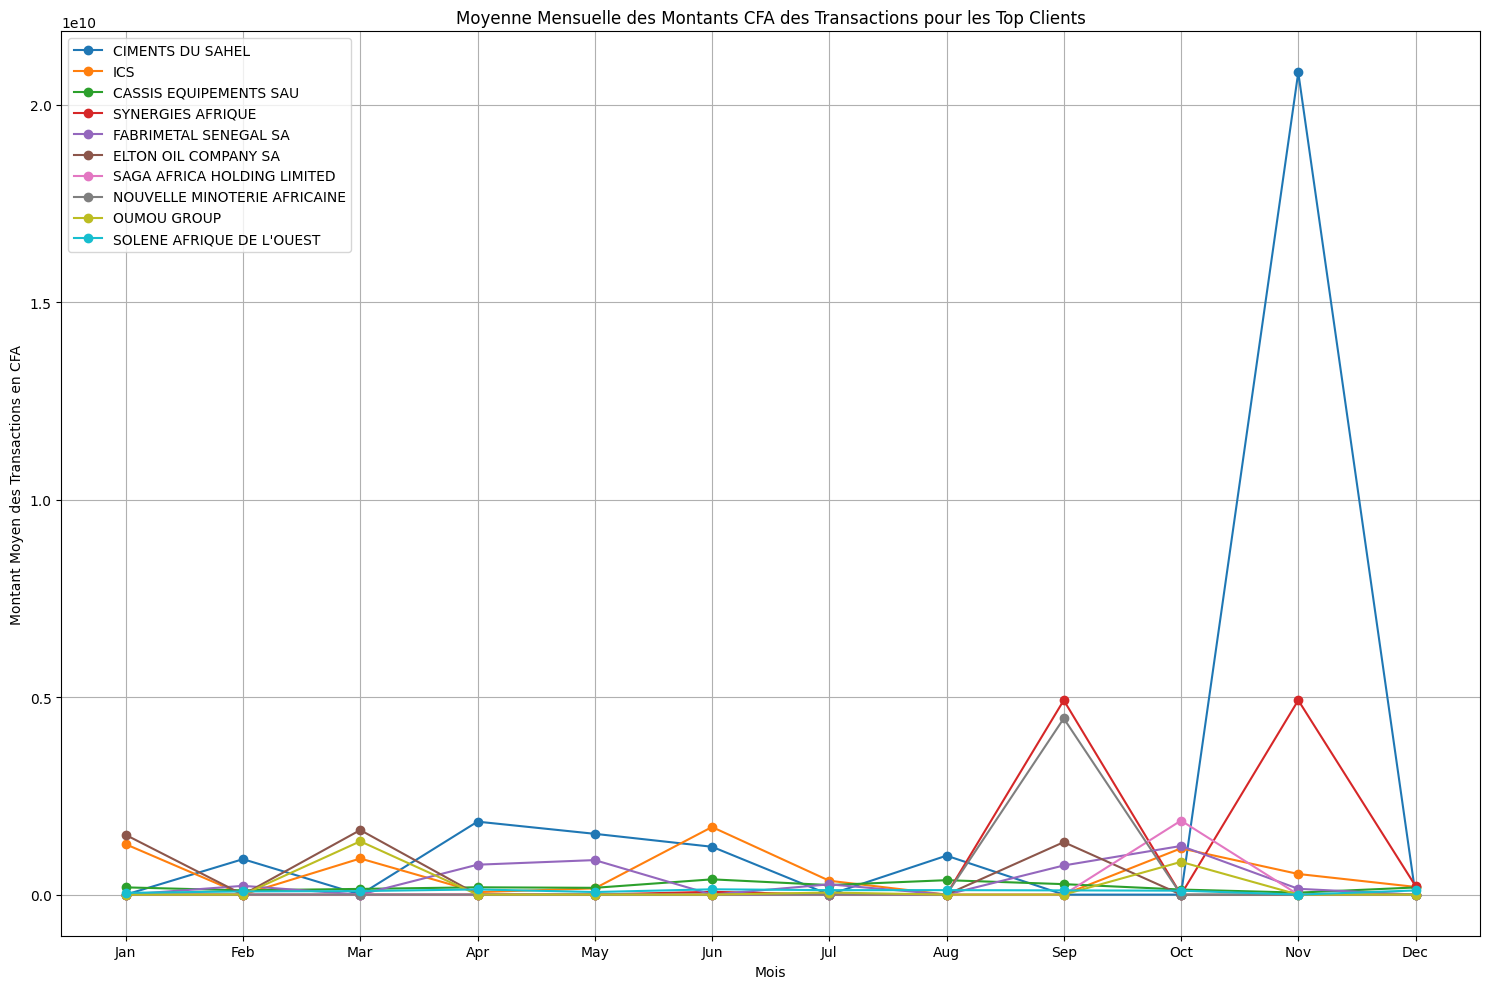

In [67]:
# Créer des graphiques pour les moyennes mensuelles des montants CFA des top clients
plt.figure(figsize=(15, 10))

for client in top_10_clients:
    plt.plot(monthly_avg_top_clients.index, monthly_avg_top_clients[client], marker='o', linestyle='-', label=client)

# Configuration du graphique
plt.title('Moyenne Mensuelle des Montants CFA des Transactions pour les Top Clients')
plt.xlabel('Mois')
plt.ylabel('Montant Moyen des Transactions en CFA')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Afficher le graphique
plt.tight_layout()
plt.show()


In [68]:
# Calculer le nombre de transactions pour chaque mois pour chaque client
transaction_count_top_clients = credoc_data_top_clients.groupby(['NOM', 'Month'])[' MONT_LOC '].count().unstack(level=0)
transaction_count_top_clients = transaction_count_top_clients.fillna(0)  # Remplir les valeurs manquantes avec 0

In [69]:
# Calculer la moyenne des transactions mensuelles pour chaque client
monthly_transaction_avg_top_clients = credoc_data_top_clients.groupby(['NOM', 'Month'])[' MONT_LOC '].count().unstack(level=0)
monthly_transaction_avg_top_clients = monthly_transaction_avg_top_clients.fillna(0)  # Remplir les valeurs manquantes avec 0

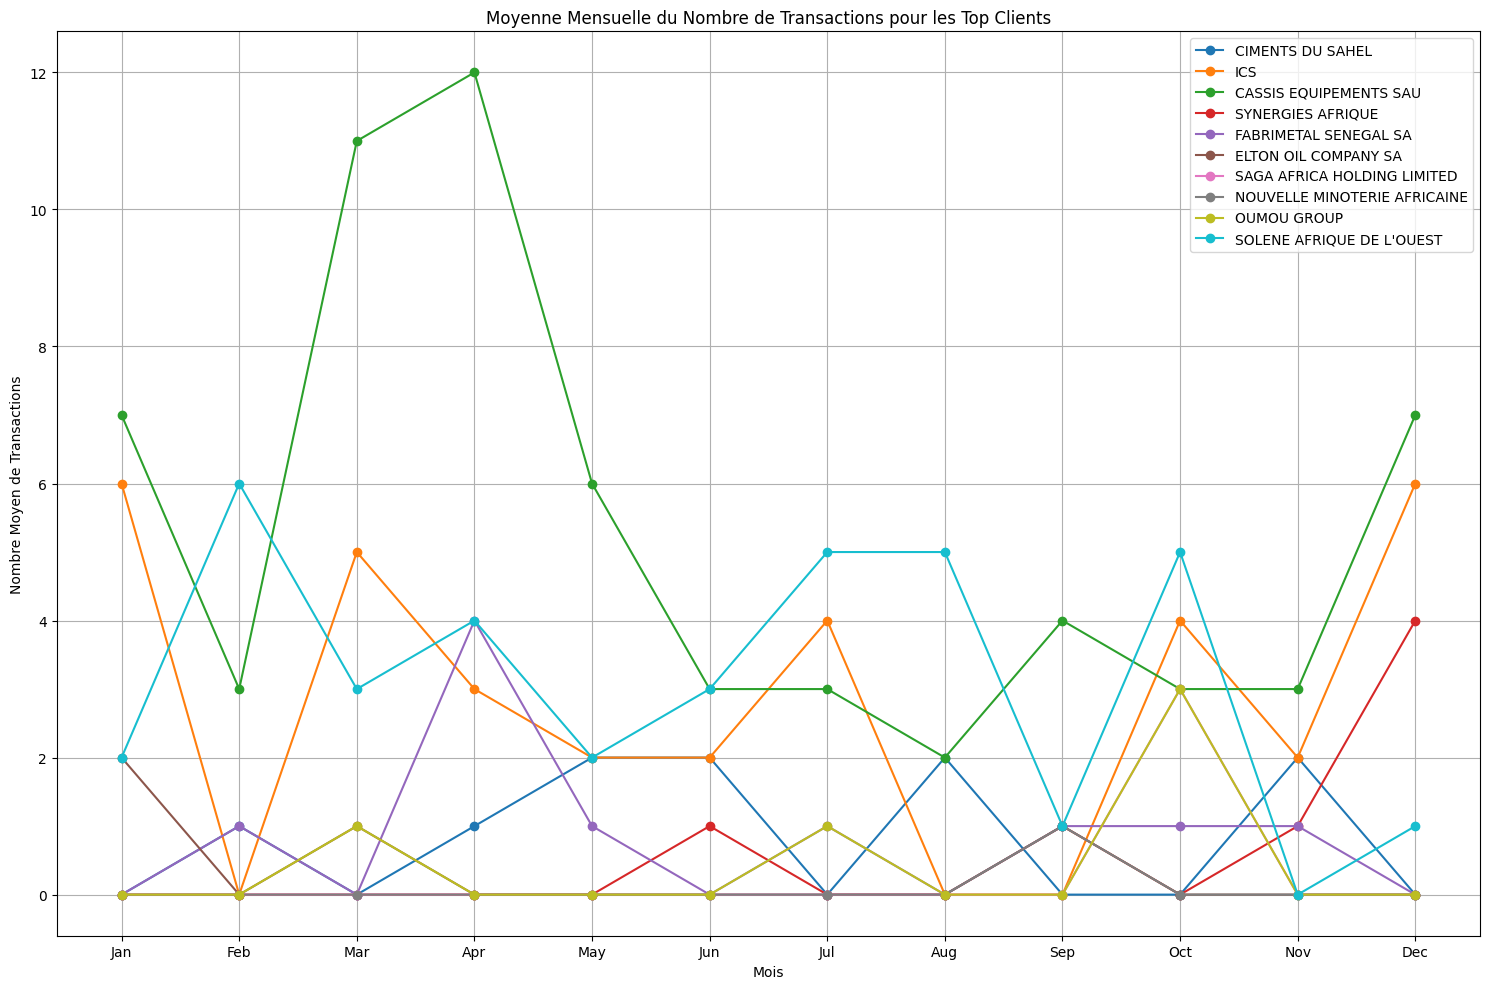

In [70]:
# Créer des graphiques pour les moyennes mensuelles des transactions des top clients
plt.figure(figsize=(15, 10))

for client in top_10_clients:
    plt.plot(monthly_transaction_avg_top_clients.index, monthly_transaction_avg_top_clients[client], marker='o', linestyle='-', label=client)

# Configuration du graphique
plt.title('Moyenne Mensuelle du Nombre de Transactions pour les Top Clients')
plt.xlabel('Mois')
plt.ylabel('Nombre Moyen de Transactions')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Afficher le graphique
plt.tight_layout()
plt.show()


In [71]:
# Calculer le nombre de transactions pour chaque mois pour chaque client
monthly_transaction_count = credoc_data_top_clients.groupby(['NOM', 'Year', 'Month'])[' MONT_LOC '].count().unstack(level=0)
monthly_transaction_count = monthly_transaction_count.fillna(0)  # Remplir les valeurs manquantes avec 0

# Calculer la moyenne mensuelle du nombre de transactions pour chaque client
monthly_transaction_avg_top_clients = monthly_transaction_count.groupby(['Month']).mean()


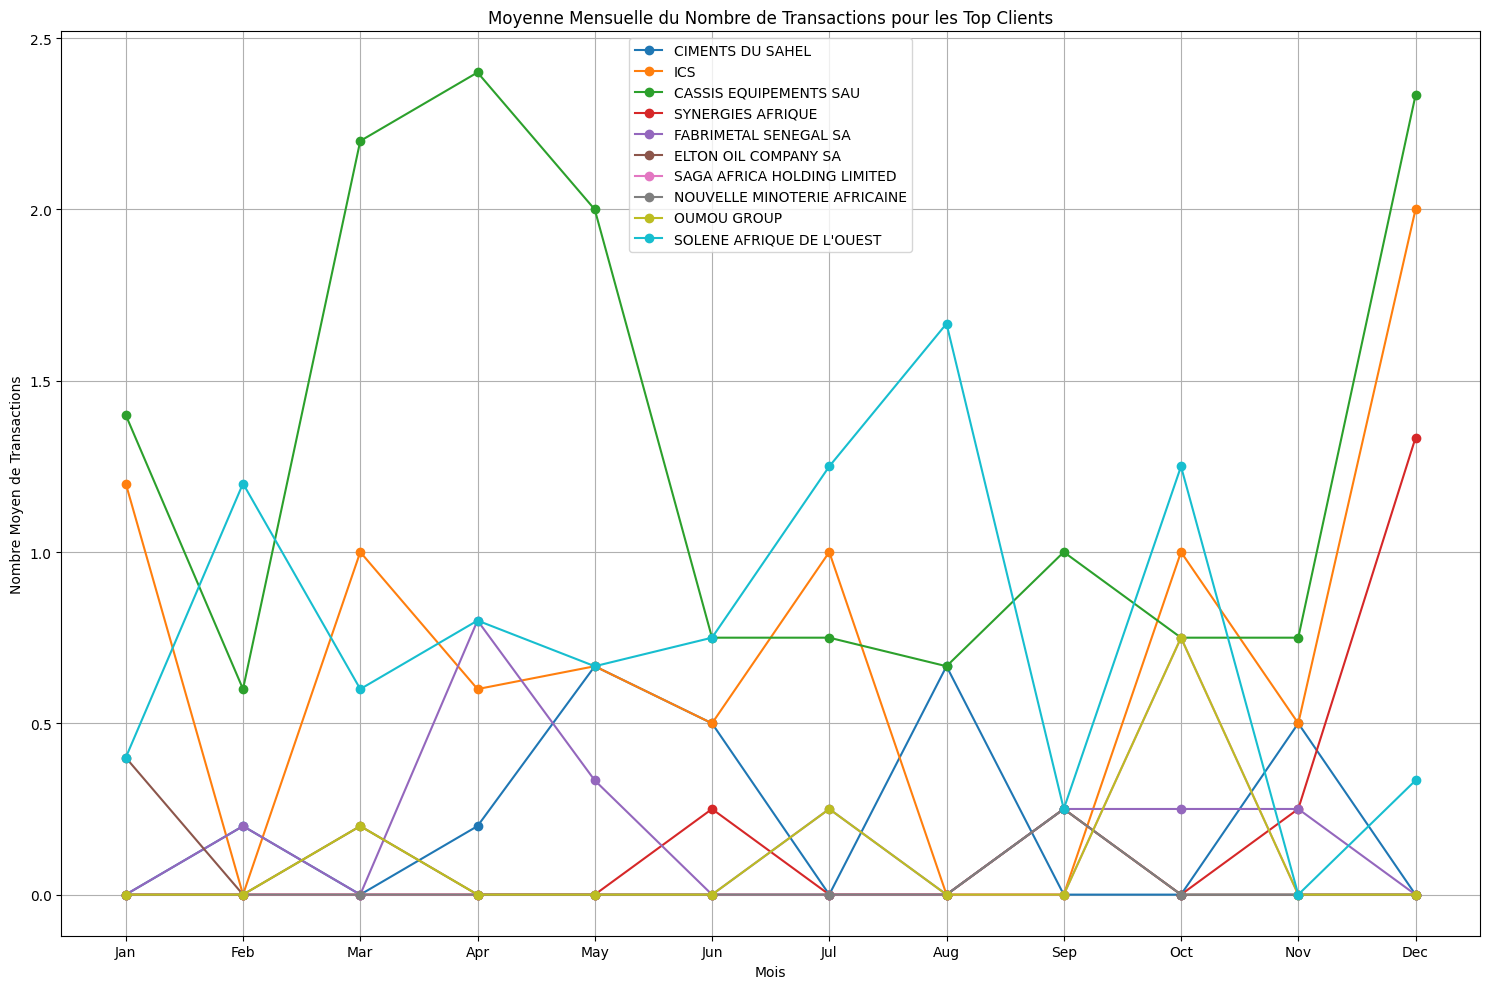

In [72]:
# Créer des graphiques pour les moyennes mensuelles des transactions des top clients
plt.figure(figsize=(15, 10))

for client in top_10_clients:
    plt.plot(monthly_transaction_avg_top_clients.index, monthly_transaction_avg_top_clients[client], marker='o', linestyle='-', label=client)

# Configuration du graphique
plt.title('Moyenne Mensuelle du Nombre de Transactions pour les Top Clients')
plt.xlabel('Mois')
plt.ylabel('Nombre Moyen de Transactions')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22300\1320978708.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flux_Diff', y='NOM', data=top_decreasing_clients, ax=axs[0], palette='Reds_r')
C:\Users\user\AppData\Local\Temp\ipykernel_22300\1320978708.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Flux_Diff', y='NOM', data=top_increasing_clients, ax=axs[1], palette='Greens')


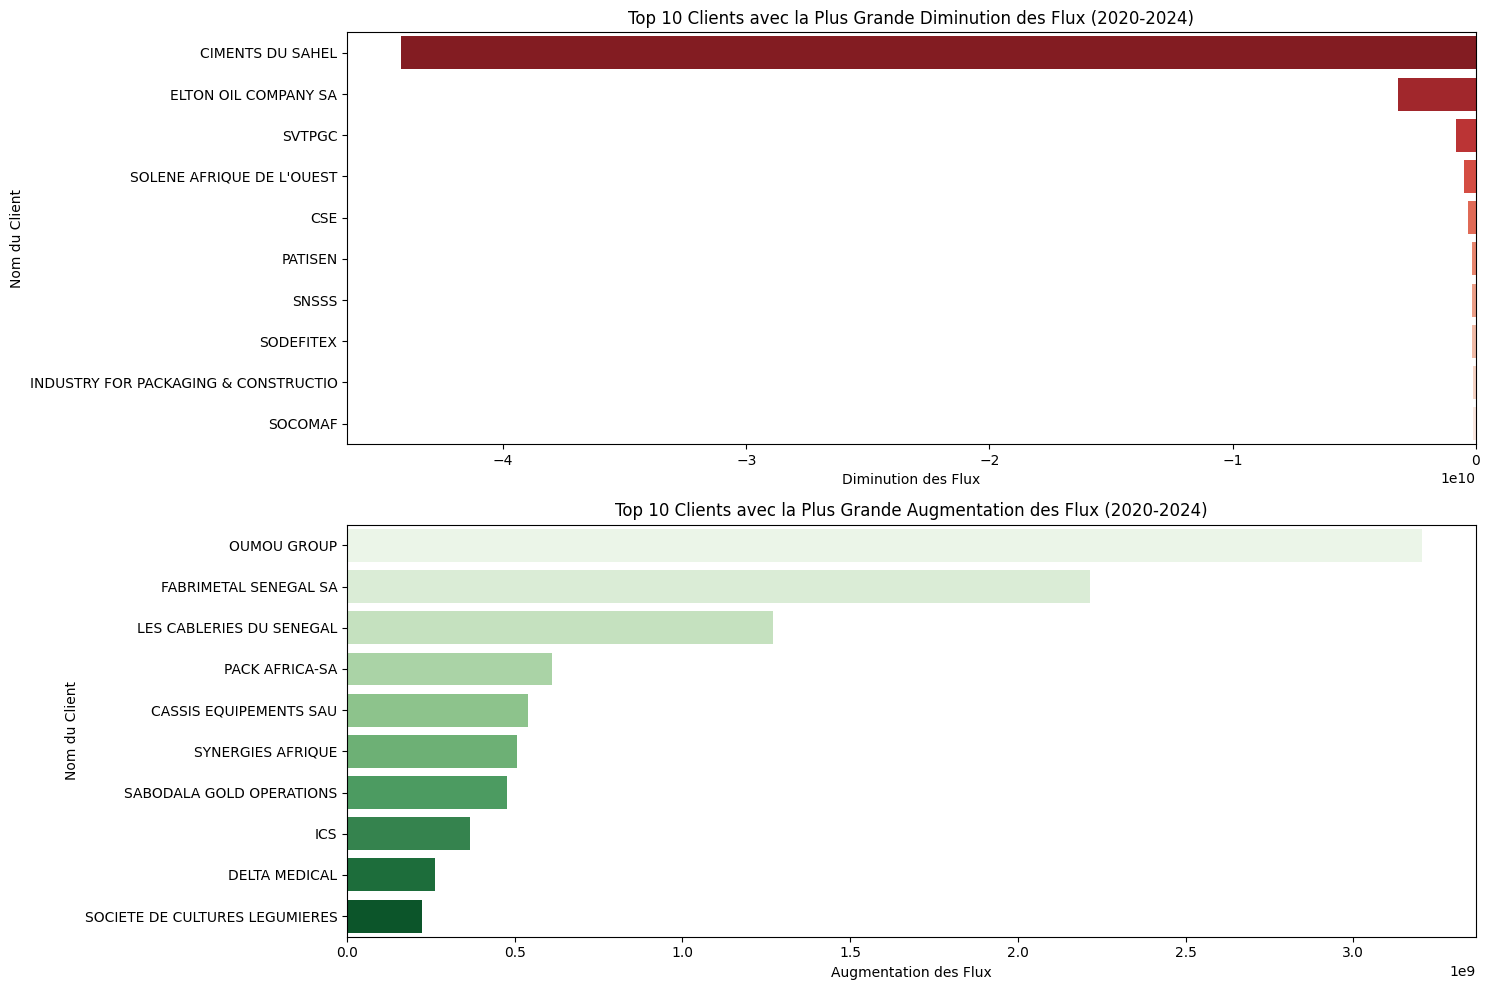

In [74]:
import seaborn as sns
# Filtrer les données pour les années 2020 à 2024
credoc_data_filtered = credoc_data[(credoc_data['Year'] >= 2020) & (credoc_data['Year'] <= 2024)]

# Agréger les flux par client et par année
flux_per_year = credoc_data_filtered.groupby(['NOM', 'Year'])[' MONT_LOC '].sum().reset_index()

# Calculer la variation des flux par client
flux_per_year['Flux_Diff'] = flux_per_year.groupby('NOM')[' MONT_LOC '].diff()

# Calculer la variation totale des flux par client sur la période 2020-2024
total_flux_diff = flux_per_year.groupby('NOM')['Flux_Diff'].sum().reset_index()

# Trier les clients par augmentation et diminution des flux
top_decreasing_clients = total_flux_diff.nsmallest(10, 'Flux_Diff')
top_increasing_clients = total_flux_diff.nlargest(10, 'Flux_Diff')

# Visualiser les résultats
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Graphique des clients avec la plus grande diminution des flux
sns.barplot(x='Flux_Diff', y='NOM', data=top_decreasing_clients, ax=axs[0], palette='Reds_r')
axs[0].set_title('Top 10 Clients avec la Plus Grande Diminution des Flux (2020-2024)')
axs[0].set_xlabel('Diminution des Flux')
axs[0].set_ylabel('Nom du Client')

# Graphique des clients avec la plus grande augmentation des flux
sns.barplot(x='Flux_Diff', y='NOM', data=top_increasing_clients, ax=axs[1], palette='Greens')
axs[1].set_title('Top 10 Clients avec la Plus Grande Augmentation des Flux (2020-2024)')
axs[1].set_xlabel('Augmentation des Flux')
axs[1].set_ylabel('Nom du Client')

plt.tight_layout()
plt.show()

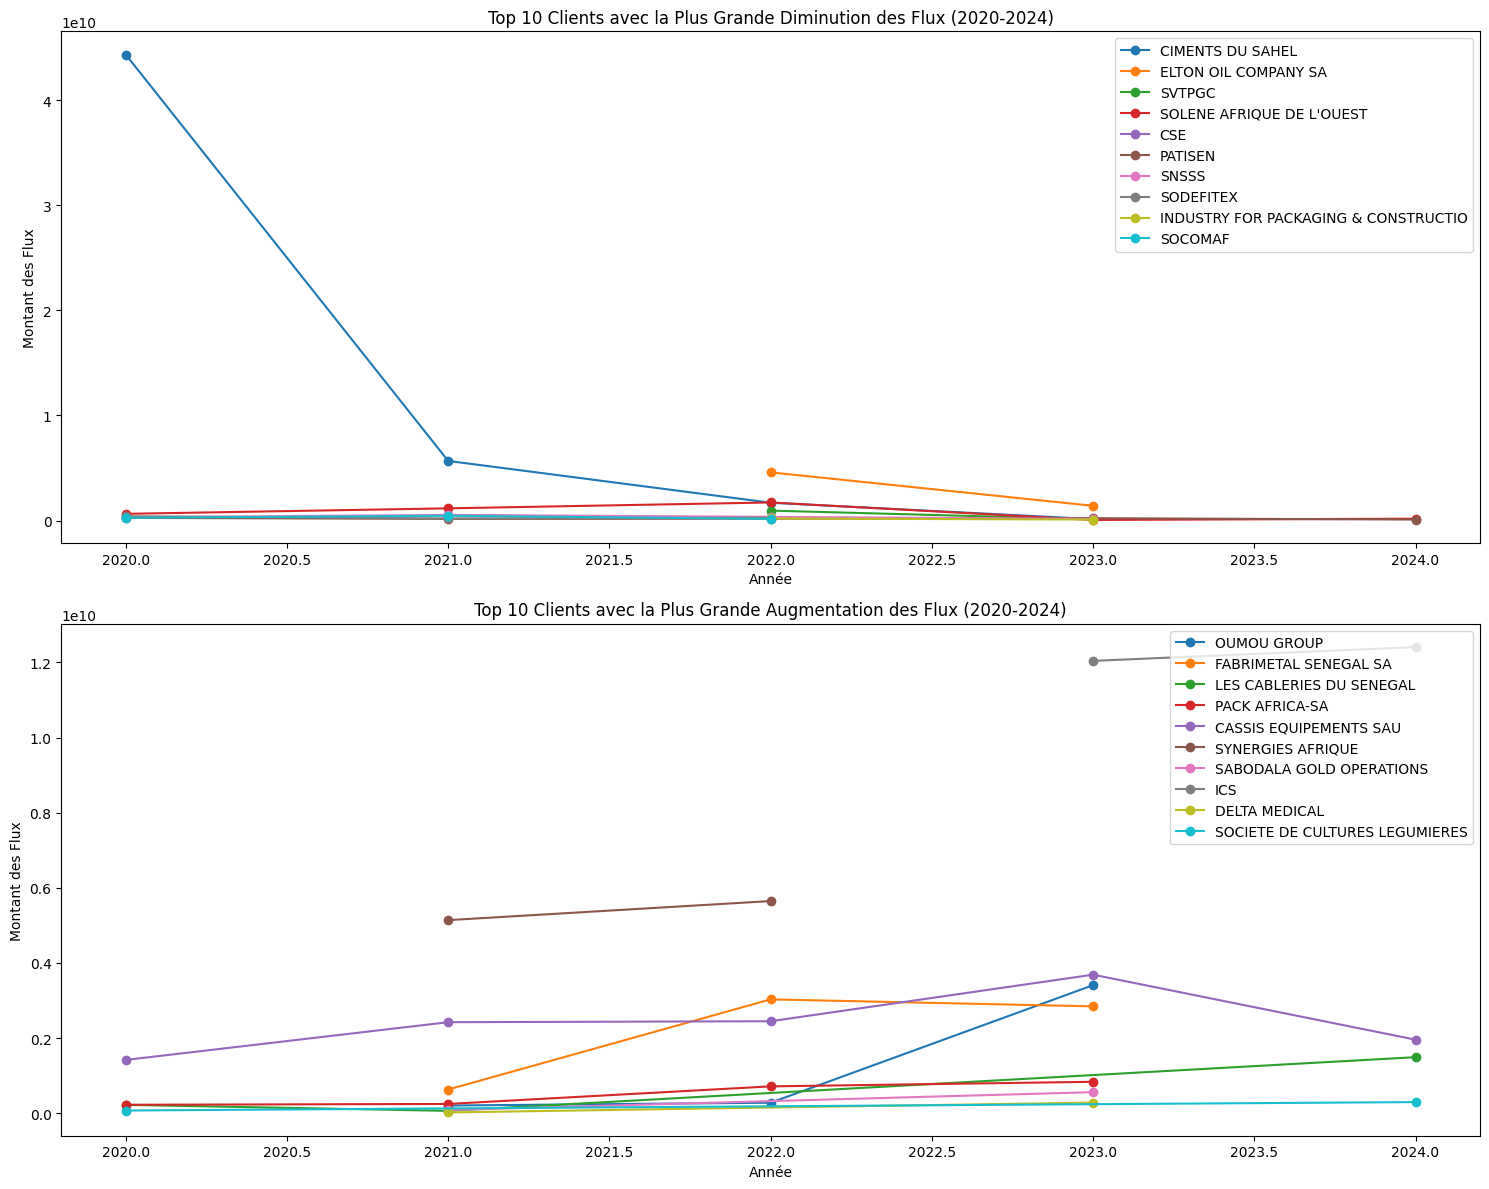

In [75]:
# Filtrer les données pour les top 10 clients qui ont diminué et augmenté leurs flux
top_clients = pd.concat([top_decreasing_clients, top_increasing_clients])['NOM'].unique()
flux_per_year_top_clients = flux_per_year[flux_per_year['NOM'].isin(top_clients)]


# Créer des graphiques de lignes pour les top 10 clients avec la plus grande diminution et augmentation des flux
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Graphique des clients avec la plus grande diminution des flux
for client in top_decreasing_clients['NOM']:
    client_data = flux_per_year_top_clients[flux_per_year_top_clients['NOM'] == client]
    axs[0].plot(client_data['Year'], client_data[' MONT_LOC '], marker='o', label=client)

axs[0].set_title('Top 10 Clients avec la Plus Grande Diminution des Flux (2020-2024)')
axs[0].set_xlabel('Année')
axs[0].set_ylabel('Montant des Flux')
axs[0].legend(loc='upper right')

# Graphique des clients avec la plus grande augmentation des flux
for client in top_increasing_clients['NOM']:
    client_data = flux_per_year_top_clients[flux_per_year_top_clients['NOM'] == client]
    axs[1].plot(client_data['Year'], client_data[' MONT_LOC '], marker='o', label=client)

axs[1].set_title('Top 10 Clients avec la Plus Grande Augmentation des Flux (2020-2024)')
axs[1].set_xlabel('Année')
axs[1].set_ylabel('Montant des Flux')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

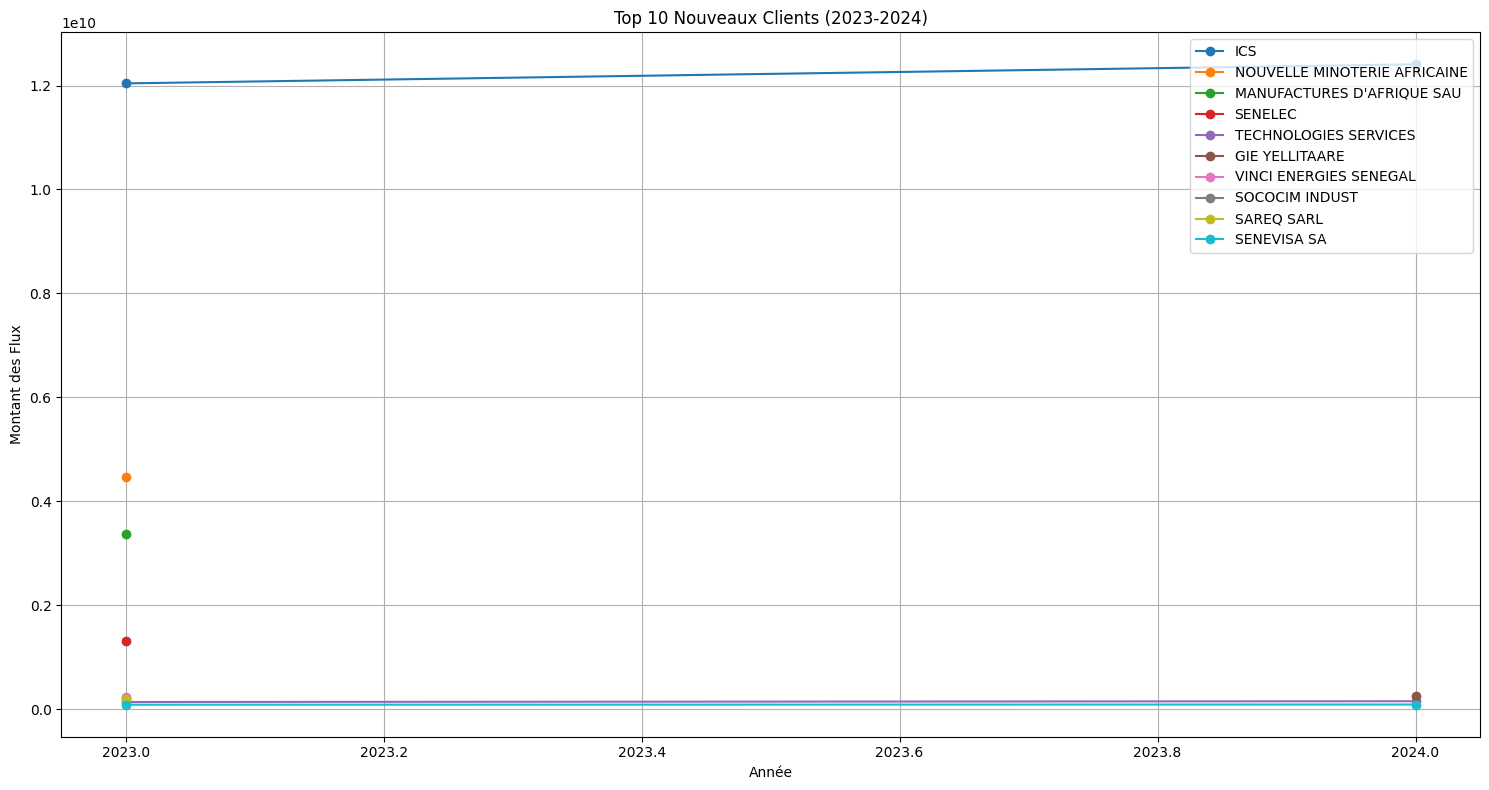

In [77]:
# Filtrer les données pour les années 2023 à 2024
credoc_data_filtered = credoc_data[(credoc_data['Year'] >= 2023) & (credoc_data['Year'] <= 2024)]

# Identifier les nouveaux clients (ceux qui n'ont aucune transaction avant 2023)
new_clients = credoc_data[credoc_data['Year'] >= 2023]['NOM'].unique()
existing_clients_before_2023 = credoc_data[credoc_data['Year'] < 2023]['NOM'].unique()
new_clients_only = list(set(new_clients) - set(existing_clients_before_2023))

# Filtrer les données pour les nouveaux clients
new_clients_data = credoc_data_filtered[credoc_data_filtered['NOM'].isin(new_clients_only)]

# Agréger les flux par client et par année pour les nouveaux clients
flux_per_year_new_clients = new_clients_data.groupby(['NOM', 'Year'])[' MONT_LOC '].sum().reset_index()

# Calculer le montant total des flux pour chaque nouveau client sur la période 2023-2024
total_flux_new_clients = flux_per_year_new_clients.groupby('NOM')[' MONT_LOC '].sum().reset_index()

# Identifier les top 10 nouveaux clients par montant total des flux
top_new_clients = total_flux_new_clients.nlargest(10, ' MONT_LOC ')

# Filtrer les données pour les top 10 nouveaux clients
flux_per_year_top_new_clients = flux_per_year_new_clients[flux_per_year_new_clients['NOM'].isin(top_new_clients['NOM'])]

# Créer un graphique de lignes pour les top 10 nouveaux clients
plt.figure(figsize=(15, 8))

for client in top_new_clients['NOM']:
    client_data = flux_per_year_top_new_clients[flux_per_year_top_new_clients['NOM'] == client]
    plt.plot(client_data['Year'], client_data[' MONT_LOC '], marker='o', label=client)

plt.title('Top 10 Nouveaux Clients (2023-2024)')
plt.xlabel('Année')
plt.ylabel('Montant des Flux')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()